In [1]:
%load_ext autoreload
%autoreload 2
import lusee
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.figure()
matplotlib.rcParams['figure.figsize'] = [5, 3.5]
matplotlib.rcParams['figure.dpi'] = 100
from scipy.ndimage import gaussian_filter
from scipy.interpolate import interp1d
from scipy.integrate import simpson


<Figure size 432x288 with 0 Axes>

In [2]:
beam = lusee.Beam()
sky_frac_in = 1-beam.ground_fraction()
sky_frac_s = gaussian_filter(sky_frac_in,1)
sky_frac_s[0] = sky_frac_in[0]
sky_frac = interp1d(np.hstack((0,beam.freq)),np.hstack((0,sky_frac_s)),kind='quadratic')

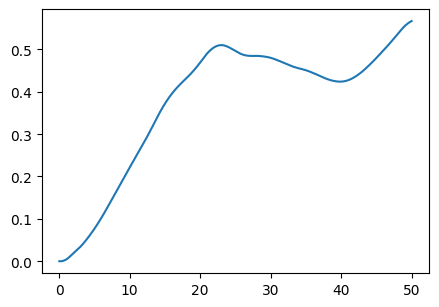

In [3]:
f=np.logspace(-2,np.log10(50.),1000)
plt.plot(f,sky_frac(f))

Text(0, 0.5, 'P [K]')

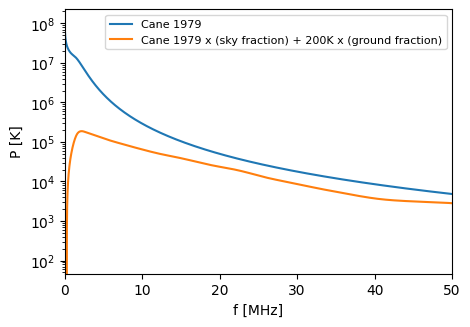

In [4]:
T_sky = lusee.monosky.T_C(f).value
T_ant = sky_frac(f)*T_sky + ((1-sky_frac(f))*200)

plt.plot(f,T_sky, label= 'Cane 1979')
plt.plot(f,T_ant, label= 'Cane 1979 x (sky fraction) + 200K x (ground fraction)')
plt.semilogy()
plt.xlim(0,50)
plt.legend(fontsize=8)
plt.xlabel('f [MHz]')
plt.ylabel('P [K]')

Text(0, 0.5, 'P [V^2/Hz]')

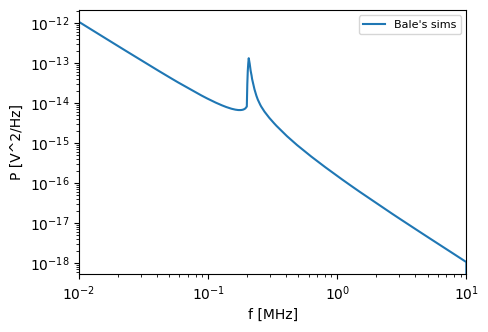

In [5]:
T=lusee.Throughput(beam)

P_plasma = np.zeros_like(f)
P_plasma[f<10] = lusee.monosky.BalePlasmaEffects()(f[f<10])

plt.plot(f,P_plasma, label= "Bale's sims")
plt.loglog()
plt.xlim(0.01,10)
plt.legend(fontsize=8)
plt.xlabel('f [MHz]')
plt.ylabel('P [V^2/Hz]')

-1.0054578975329962
-1.0054578975329962


array([-0.-50377.83707359j])

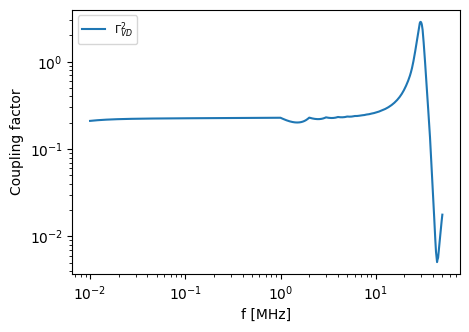

In [6]:
T=lusee.Throughput(beam)
plt.plot(f,T.Gamma_VD(f)**2,label= "$\Gamma_{VD}^2$")
#plt.plot(f,-np.imag(T.AntennaImpedanceInterp(f)), 'r-', label= "$\Gamma_{VD}^2$")
plt.loglog()
#plt.xlim(0.01,50)
plt.legend(fontsize=8)
plt.xlabel('f [MHz]')
plt.ylabel('Coupling factor')
T.AntennaImpedanceInterp(np.array([0.1]))

-1.0054578975329962
-1.0054578975329962


Text(0, 0.5, 'f x P [V^2/Hz]')

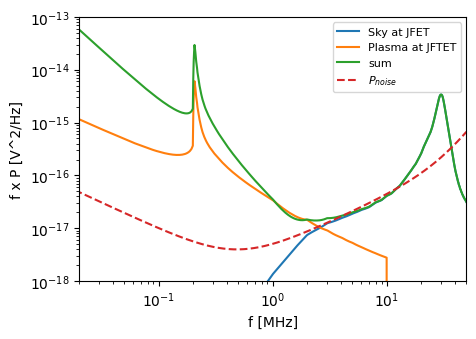

In [7]:
P_jfet = T_ant * T.T2V(f)
P_plasma_jfet  = P_plasma*T.Gamma_VD(f)**2
plt.plot(f,f*P_jfet, label= 'Sky at JFET')
plt.plot(f,f*P_plasma_jfet, label= 'Plasma at JFTET')
plt.plot(f,f*P_jfet+P_plasma_jfet, label= 'sum')
plt.plot(f,f*T.noise(f),'--',label='$P_{noise}$')
#plt.semilogy()
#plt.xlim(0,50)
plt.loglog()
plt.xlim(0.02,50)
plt.ylim(1e-18,1e-13)
plt.legend(fontsize=8)
plt.xlabel('f [MHz]')
plt.ylabel('f x P [V^2/Hz]')

Text(0, 0.5, 'gain[dB]')

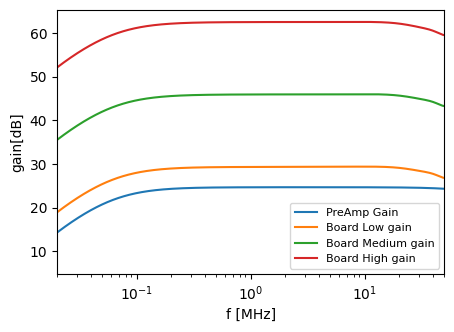

In [8]:
plt.plot(f,np.log10(np.abs(T._preamp_gain(f)**2))*10, label= 'PreAmp Gain')
plt.plot(f,np.log10(np.abs(T._gain["L"](f)**2))*10, label= 'Board Low gain')
plt.plot(f,np.log10(np.abs(T._gain["M"](f)**2))*10, label= 'Board Medium gain')
plt.plot(f,np.log10(np.abs(T._gain["H"](f)**2))*10, label= 'Board High gain')

#plt.plot(f,f*P_plasma_jfet, label= 'Plasma at JFTET')
#plt.plot(f,f*P_jfet+P_plasma_jfet, label= 'sum')
#plt.plot(f,f*T.noise(f),'--',label='$P_{noise}$')
plt.semilogx()
#plt.xlim(0,50)
#plt.loglog()
plt.xlim(0.02,50)
#plt.ylim(1e-18,1e-13)
plt.legend(fontsize=8)
plt.xlabel('f [MHz]')
plt.ylabel('gain[dB]')

Text(0, 0.5, 'Arg amplitude gain [radians]')

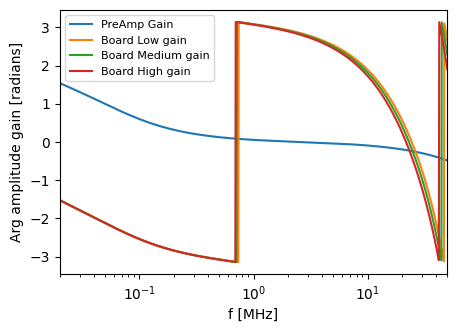

In [9]:
plt.plot(f,np.angle(T._preamp_gain(f)), label= 'PreAmp Gain')
plt.plot(f,np.angle(T._gain["L"](f)), label= 'Board Low gain')
plt.plot(f,np.angle(T._gain["M"](f)), label= 'Board Medium gain')
plt.plot(f,np.angle(T._gain["H"](f)), label= 'Board High gain')

#plt.plot(f,f*P_plasma_jfet, label= 'Plasma at JFTET')
#plt.plot(f,f*P_jfet+P_plasma_jfet, label= 'sum')
#plt.plot(f,f*T.noise(f),'--',label='$P_{noise}$')
plt.semilogx()
#plt.xlim(0,50)
#plt.loglog()
plt.xlim(0.02,50)
#plt.ylim(1e-18,1e-13)
plt.legend(fontsize=8)
plt.xlabel('f [MHz]')
plt.ylabel('Arg amplitude gain [radians]')

In [10]:

P_digitizer = (P_jfet+P_plasma_jfet) * T.power_gain(f,'M')
P_digitizer_noise = T.noise(f)*T.power_gain(f,'M')

Text(0, 0.5, 'f x P [$V^2$/Hz]')

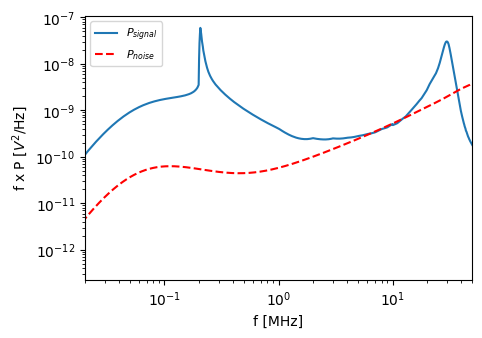

In [11]:
plt.plot(f,f*P_digitizer,'-',label='$P_{signal}$')
plt.plot(f,f*P_digitizer_noise,'r--',label='$P_{noise}$')
plt.loglog()
#plt.semilogy()
plt.xlim(0.02,50)
#plt.ylim(1e-18,1e-13)
plt.legend(fontsize=8)
plt.xlabel('f [MHz]')
plt.ylabel('f x P [$V^2$/Hz]')



In [12]:
np.sqrt(simpson((P_digitizer+P_digitizer_noise),f*1e6)) #1e6 converts MHz to Hz

0.14661931833574698

In [16]:
np.sqrt(simpson(P_jfet*T.power_gain(f,'M'),f*1e6))

0.09276347801280801